## Deforestation Impact

The deforestation (or land use change) due to commodity driven agriculture is a useful measure of the impact a comapnys supply chain has on nature.

Here we attempt to measure the likelihood that deforestation in an area is due to the presence of some commodity production, as well as the impact on the quality of forest as a result.

A supply chain should aim to minimise the amount of deforestation as a result of it's presence, as per SDG targets 15.1 and 15.2.


Potential datasets:

- 

### Import libraries:

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import rasterio as rio
import rasterio.plot
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import time
from rasterstats import gen_zonal_stats, gen_point_query
from shapely.geometry import shape, mapping
import folium
from rasterstats import gen_zonal_stats, gen_point_query
import h3
import os

/Users/vizzuality/anaconda3/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.2 b55d2125) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from processing.geolocating_data import GeolocateAddress

## Inspect Satelligence Data
 
 
As per SDG 15.1 and 15.2 - we are interested in:

- 15.1.1 - Forest Area as a proportion of Land.
- 15.2.1 - Progress towards sustainable forest management

We should extract the % area cover of forest in the region, as well as change.


In [3]:
input_path = '../../datasets/raw/satelligence_sample_data'

os.listdir(input_path)

['change_detection',
 '.DS_Store',
 'IND_Riau_outline.prj',
 'forest_and_plantation_baseline',
 'carbonstock',
 'IDN_Riau_outline.geojson',
 'IND_Riau_outline.shx',
 'IND_Riau_outline.shp',
 'IND_Riau_outline.cpg',
 'IND_Riau_outline.dbf',
 'IDN_Riau_Baseline_2019']

In [4]:
baseline_path =  input_path + '/forest_and_plantation_baseline'
change_path =  input_path + '/change_detection'

In [5]:
# Baseline Forest

files = [f"/{f}" for f in os.listdir(baseline_path) if '.tif' in f]
files

['/IDN_Riau_Forest_and_plantation_baseline_20180101.tif.aux.xml',
 '/IDN_Riau_Forest_and_plantation_baseline_20180101.tif',
 '/IDN_Riau_baseline_2019.tif']

In [6]:
file = baseline_path + files[1]

#explore datasets info for calculation - the three raster need to have the same extent and projection
baseline_info = !gdalinfo $file
baseline_info

['dyld: Library not loaded: /usr/local/opt/openssl/lib/libcrypto.1.0.0.dylib',
 '  Referenced from: /usr/local/bin/gdalinfo',
 '  Reason: image not found']

In [7]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#ffffff','#9bff8f','#73a367'])

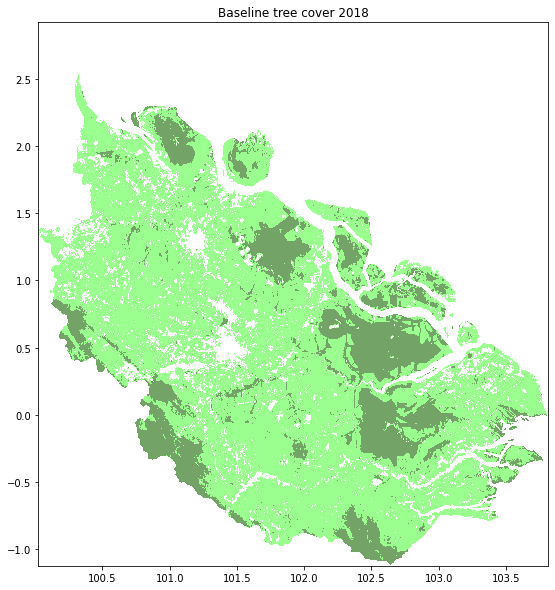

In [8]:
#check 2018 baseline

# Legend
# 0 Non forest  
# 1 Forest
# 2 Primary Forest

with rio.open(file) as src:
    image_array = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=2, cmap=custom_cmap, ax=ax, transform=src.transform)
    ax.set_title('Baseline tree cover 2018')
    
    

In [9]:
file = baseline_path + files[2]

#explore datasets info for calculation - the three raster need to have the same extent and projection
baseline_info = !gdalinfo $file
baseline_info

['dyld: Library not loaded: /usr/local/opt/openssl/lib/libcrypto.1.0.0.dylib',
 '  Referenced from: /usr/local/bin/gdalinfo',
 '  Reason: image not found']

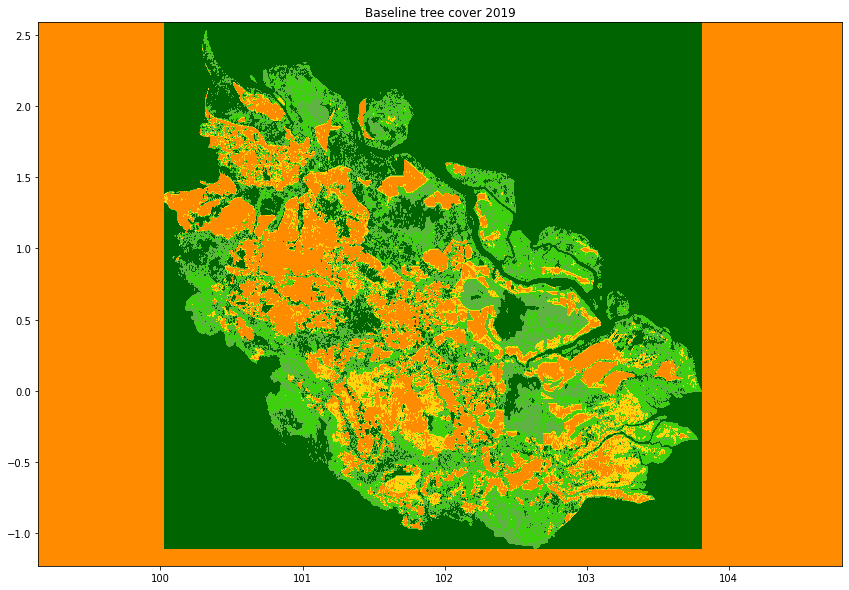

In [10]:
#check calculated risk map

custom_cmap = ListedColormap(["darkgreen","#5eb342","#3dd00d","#ffd60e","darkorange"])

# Legend
# 1 Primary Forest
# 2 Logged over Forest
# 3 Degraded or regenerating Forest
# 4 Other plantations
# 5 Palm oil plantations

with rio.open(file) as src:
    image_array = src.read(1)
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=5, cmap=custom_cmap, ax=ax, transform=src.transform)
    ax.set_title('Baseline tree cover 2019')
    
    

In [11]:
# Forest change

files = [f"/{f}" for f in os.listdir(change_path) if '.tif' in f]
files

['/IDN_Riau_ChangeDetection_ForestAndPlantations.tif']

In [12]:
file = change_path + files[0]

#explore datasets info for calculation - the three raster need to have the same extent and projection
change_info = !gdalinfo $file
change_info

['dyld: Library not loaded: /usr/local/opt/openssl/lib/libcrypto.1.0.0.dylib',
 '  Referenced from: /usr/local/bin/gdalinfo',
 '  Reason: image not found']

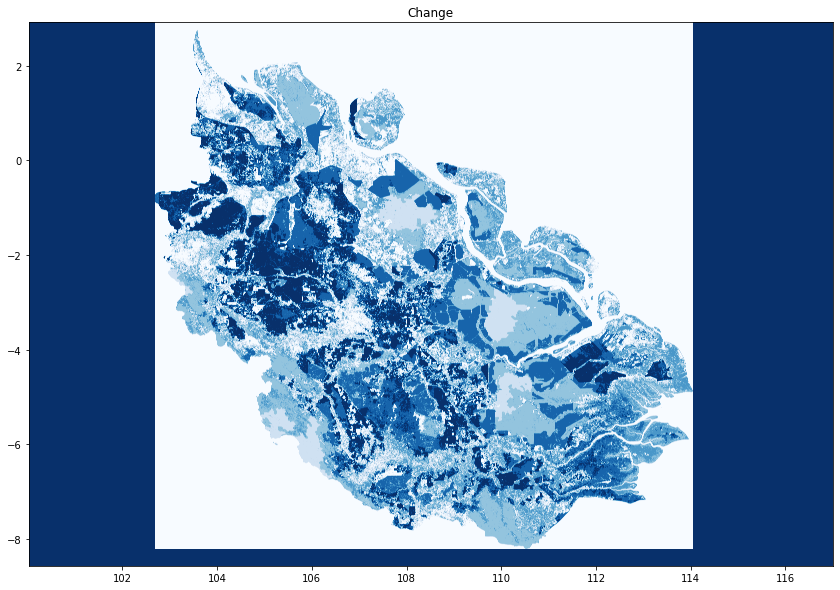

In [13]:
#check calculated risk map

# Values in format YYYY-jjj e.g. 2019074 where jjj = julian day from 1-366

with rio.open(file) as src:
    image_array = src.read(1)
    meta = src.meta
    profile = src.profile
    
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(image_array, vmin=0, vmax=5, cmap='Blues', ax=ax, transform=src.transform)
    ax.set_title('Change')
    
    

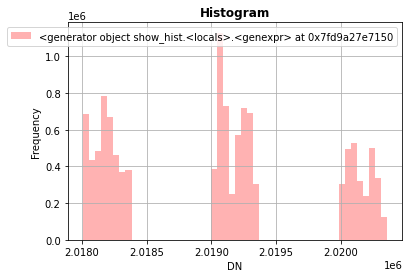

In [14]:
src = rio.open(file)
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

In [15]:
image_array.shape

(14995, 14063)

In [16]:
## Set values to year
loss2018_array = image_array.copy()

loss2018_array[loss2018_array < 2019000] = 1
loss2018_array[loss2018_array >= 2019000] = 0

Text(0.5, 1.0, 'Change')

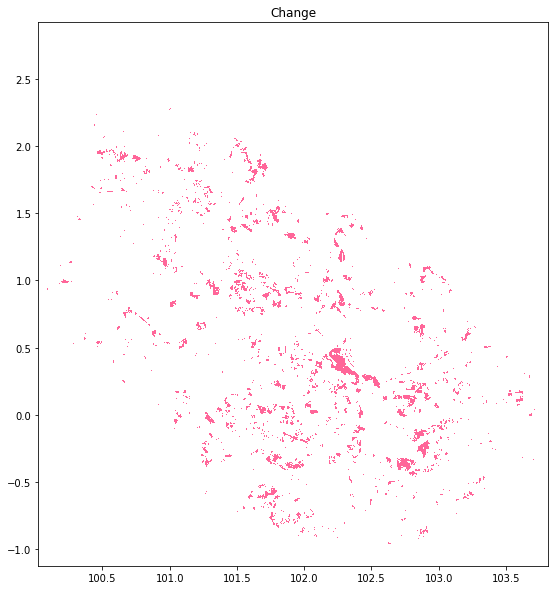

In [17]:
custom_cmap = ListedColormap(["#f69", "white"])

fig, ax = plt.subplots(figsize=[15,10])
rio.plot.show(loss2018_array, vmin=0, vmax=1, cmap=custom_cmap, ax=ax, transform=src.transform)
ax.set_title('Change')

In [18]:
output_path = '../../datasets/processed/'

os.listdir(input_path)

['change_detection',
 '.DS_Store',
 'IND_Riau_outline.prj',
 'forest_and_plantation_baseline',
 'carbonstock',
 'IDN_Riau_outline.geojson',
 'IND_Riau_outline.shx',
 'IND_Riau_outline.shp',
 'IND_Riau_outline.cpg',
 'IND_Riau_outline.dbf',
 'IDN_Riau_Baseline_2019']

In [19]:
meta

{'count': 1,
 'crs': CRS.from_dict(init='epsg:4326'),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 14995,
 'nodata': -3.4028234663852886e+38,
 'transform': Affine(0.0002694944179762499, 0.0, 100.02453,
       0.0, -0.00026949516505501834, 2.9189),
 'width': 14063}

In [20]:
## Save as rio dataset

with rasterio.open(output_path + 'sat_loss_2018.tif', "w", **profile) as dest:
    dest.write(loss2018_array, 1)
    
loss2018_array = None

In [ ]:
# open again

custom_cmap = ListedColormap([ "#f69", "white"])

with rio.open(output_path + 'sat_loss_2018.tif') as src:
    image_array = src.read(1)
    meta = src.meta
    profile = src.profile
    
    fig, ax = plt.subplots(figsize=[15,10])
    rio.plot.show(data, vmin=0, vmax=1, cmap=custom_cmap, ax=ax, transform=src.transform)
    ax.set_title('Loss 2018')
    
    

In [ ]:
image_array = None
data = None

### Calculation of Commodity-driven Deforestation Risk 

Using the Assignation Function (f') of each pixel:

`f' = (V * Af) / (AT * Y)`

- V = Volume of commodity Purchased
- Af = Area Fraction used to produce commodity (per pixel)
- AT = Total area used to produce commodity
- Y = Commodity yield (per pixel)

We then have a measure of the likelihood that the purchased commoity was sources inside a given pixel (0-1). 

From there we need to locate deforestation pixels and associate them with commodity pixels

### Calculation of risk map - impact factor for different locations: 



In [ ]:
ha_fraction_path = '../../datasets/raw/cotton_HarvestedAreaFraction.tif'
yield_path = '../../datasets/raw/cotton_YieldPerHectare.tif'

### 1. Check raster info:

In [ ]:
!gdalinfo $ha_fraction_path

### 2. Extent:
The three rasters have the same projection but the blue water footprint has different extent. Therefore we need to get the rasters into the same extent.


### 3. Calculate risk 

### 4. Explore output:

### 4. Reproject raster from epsg:4326 to epsg:3857

Reproject raster from 4326 to 3857 as the hexgrid is in that projection. We can do it the other way around by reprojecting the vector layer from epsg:3857 to epsg:4326.